# Regressão Linar Múltipla com os dados do Enade 2018
## Alunos dos cursos de Ciências Economia 
---
* Incorporar variáveis independentes que expliquem o fenômeno
* Função de produção educacional
> Variáveis: esforço, nível econômico, nível social da família, conhecimento

In [10]:
install.packages("ggpubr")

Warning message:
"package 'ggpubr' is in use and will not be installed"

In [47]:
library(dplyr)
library(ggplot2)
library(AER)
library(gvlma)
library(lmtest)
library(nortest)
library(ggpubr)
library(plyr)


In [48]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [69]:
df = data[data$CO_GRUPO == 13,]

In [70]:
str(df)

'data.frame':	9582 obs. of  137 variables:
 $ NU_ANO            : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ CO_IES            : int  1780 1780 1780 1780 1780 1780 1780 1780 1780 1780 ...
 $ CO_CATEGAD        : int  10008 10008 10008 10008 10008 10008 10008 10008 10008 10008 ...
 $ CO_ORGACAD        : int  10022 10022 10022 10022 10022 10022 10022 10022 10022 10022 ...
 $ CO_GRUPO          : int  13 13 13 13 13 13 13 13 13 13 ...
 $ CO_CURSO          : int  81867 81867 81867 81867 81867 81867 81867 81867 81867 81867 ...
 $ CO_MODALIDADE     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_MUNIC_CURSO    : int  4309605 4309605 4309605 4309605 4309605 4309605 4309605 4309605 4309605 4309605 ...
 $ CO_UF_CURSO       : int  43 43 43 43 43 43 43 43 43 43 ...
 $ CO_REGIAO_CURSO   : int  4 4 4 4 4 4 4 4 4 4 ...
 $ NU_IDADE          : int  28 30 29 22 47 27 23 48 23 21 ...
 $ TP_SEXO           : Factor w/ 2 levels "F","M": 1 2 2 1 2 2 1 1 2 1 ...
 $ ANO_FIM_EM        : int  2008 2006 20

In [71]:
summary(notas)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    28.9    37.2    38.4    47.0    90.2    1509 

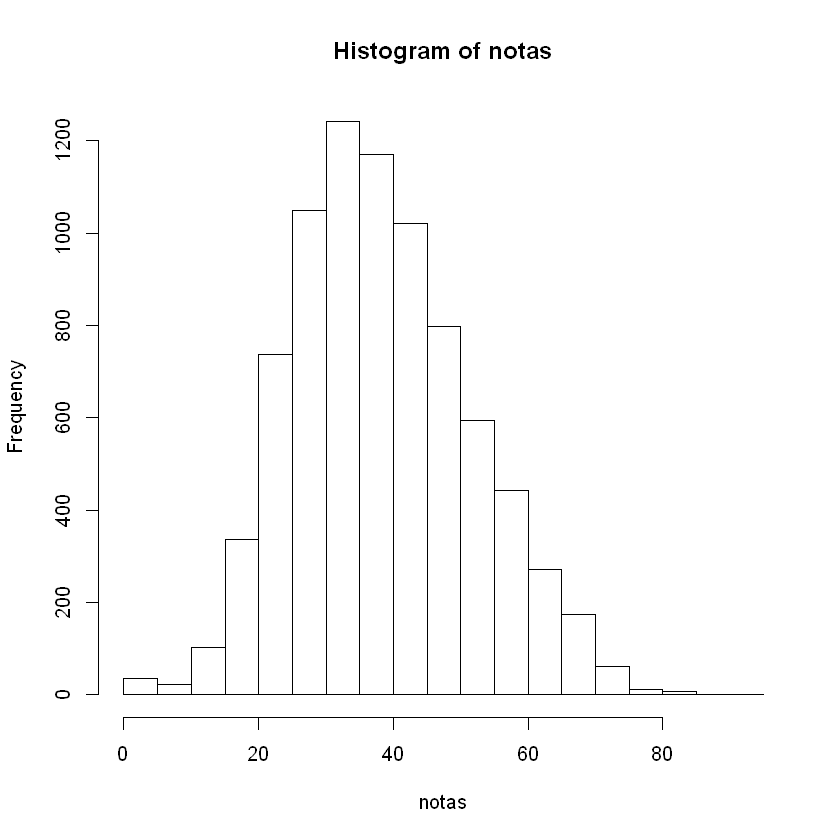

In [72]:
hist(notas)

In [103]:
modalidade = as.factor(df$CO_MODALIDADE) 

In [104]:
table(modalidade)

modalidade
   1    2 
9431  151 

In [105]:
modalidade = mapvalues(df$CO_MODALIDADE, from=c(1,2), to=c("presencial","distancia"))

In [106]:
prop.table(table(modalidade))

modalidade
 distancia presencial 
0.01575871 0.98424129 

# Comportamento das notas detas categorias
---
* Não existe muita diferênça na média entre o ensino presencial e à distância

In [107]:
tapply(notas, modalidade, FUN=mean,na.rm=TRUE)

distancia presencial 
  38.28300   38.39886

Warning message:
"Removed 1509 rows containing non-finite values (stat_summary)."

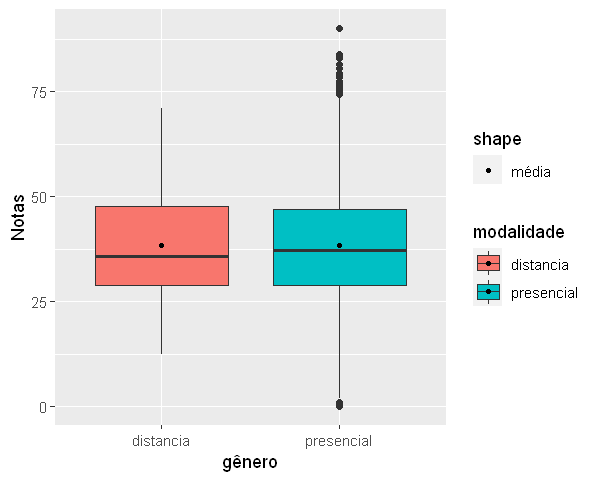

In [108]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x=modalidade, y=notas, fill=modalidade)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1)+
    xlab("gênero")+
    ylab("Notas");